Munia Shaheen (20101050)

Akib Zabed Ifti (20101113)

Junaed Hossain (20101196)


# Online Sexism Detection

In [2]:
movie_reviews = pd.read_csv("train_all_tasks.csv")

In [3]:
movie_reviews.shape

(14000, 5)

In [4]:
movie_reviews.head(10)

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none
5,sexism2022_english-10376,yeah but in order to keep the benefit i have t...,not sexist,none,none
6,sexism2022_english-4569,Hahaha I just wish they would live their truth...,not sexist,none,none
7,sexism2022_english-91,head mod said she talked to him after he made ...,not sexist,none,none
8,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
9,sexism2022_english-16316,We most definitely did. I didn’t go too much i...,not sexist,none,none


In [5]:
movie_reviews.isnull().values.any()

False

In [6]:
movie_reviews.drop(['rewire_id','label_category','label_vector'],axis=1,inplace=True)

In [7]:
movie_reviews.head(5)

,text,label_sexist
0,"Damn, this writing was pretty chaotic",not sexist
1,"Yeah, and apparently a bunch of misogynistic v...",not sexist
2,How the FUCK is this woman still an MP!!!???,not sexist
3,Understand. Know you're right. At same time I ...,not sexist
4,Surprized they didn't stop and rape some women,not sexist


# Preprocess

In [8]:
movie_reviews["text"][2]

'How the FUCK is this woman still an MP!!!???'

In [9]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Munia
[nltk_data]     Shaheen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [12]:
X = []
sentences = list(movie_reviews['text'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [13]:
X[2]

'fuck woman still mp '

In [14]:
y = movie_reviews['label_sexist']

y = np.array(list(map(lambda x: 1 if x=="not sexist" else 0, y)))

In [15]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
# new=pd.DataFrame(zip(X, y), columns=['text', 'label_sexist'])

In [17]:
# new.head(5)

# Balancing

In [18]:
# import seaborn as sns
# sns.countplot(x='label_sexist', data=new)

In [19]:
# new['label_sexist'].value_counts()
# #0 = not sexist 1= sexist

In [20]:
# df_1 = new[new['label_sexist'] == 0].iloc[0: 3398, :]

In [21]:
# df_2 = new[new['label_sexist'] == 1].iloc[0: 3398, :]

In [22]:
# balanced = pd.concat([df_1,df_2])

In [23]:
# balanced['label_sexist'].value_counts()

In [24]:
# X = balanced.drop('label_sexist',axis='columns')
# y = balanced['label_sexist']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train);

In [27]:
x_train = vectorizer.transform(X_train)
x_test = vectorizer.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [29]:
### Machine learning models
## Logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
#k-nearest neighbours
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [31]:
##Naive Bayes I
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [34]:
## Multinomial naive bayes
mnb = MultinomialNB ()
mnb.fit(x_train, y_train)

MultinomialNB()

In [35]:
### Support vector machine
svm_model = LinearSVC()
svm_model.fit(x_train, y_train)

LinearSVC()

In [36]:
### Random Forest
randomforest = RandomForestClassifier(n_estimators=100, random_state=50)
randomforest.fit(x_train, y_train)

RandomForestClassifier(random_state=50)

In [37]:
from sklearn.metrics import f1_score
f1_score_data = {'F1 Score': [f1_score(lr.predict(x_test), y_test),
                              f1_score(knn.predict(x_test), y_test),
                              f1_score(bnb.predict(x_test), y_test),
                              f1_score(mnb.predict(x_test), y_test),
                              f1_score(svm_model.predict(x_test), y_test),
                              f1_score(randomforest.predict(x_test), y_test)]}
##Saving fi score results into a dataframe
df_f1=pd.DataFrame(f1_score_data, index=['Log Regression', 'KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])
df_f1


,F1 Score
Log Regression,0.881851
KNN,0.855666
BernoulliNB,0.867957
MultinomialNB,0.877100
SVM,0.862061
Random Forest,0.893543


# For DL part

In [38]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [39]:
vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

18178

In [40]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Need to download the GloVe file: https://drive.google.com/file/d/16_K-L-m9P3w4AdZAFO0mu7GtJK-xmvGI/view?usp=share_link

In [41]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [42]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [43]:
embedding_matrix.shape

(18178, 100)

In [44]:
# Neural Network architecture
snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)
snn_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
snn_model.add(Dense(1, activation='sigmoid'))

In [45]:
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1817800   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,860,105
Trainable params: 42,305
Non-trainable params: 1,817,800
_________________________________________________________________
None


In [46]:
# Model training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
70/70 [==============================] - 27s 330ms/step - loss: 0.5755 - acc: 0.7545 - val_loss: 0.5602 - val_acc: 0.7496
Epoch 2/50
70/70 [==============================] - 22s 308ms/step - loss: 0.5468 - acc: 0.7619 - val_loss: 0.5577 - val_acc: 0.7496
Epoch 3/50
70/70 [==============================] - 21s 306ms/step - loss: 0.5192 - acc: 0.7576 - val_loss: 0.5197 - val_acc: 0.7496
Epoch 4/50
70/70 [==============================] - 21s 297ms/step - loss: 0.4952 - acc: 0.7626 - val_loss: 0.4923 - val_acc: 0.7683
Epoch 5/50
70/70 [==============================] - 22s 318ms/step - loss: 0.4819 - acc: 0.7735 - val_loss: 0.5294 - val_acc: 0.7531
Epoch 6/50
70/70 [==============================] - 21s 299ms/step - loss: 0.4774 - acc: 0.7708 - val_loss: 0.4859 - val_acc: 0.7522
Epoch 7/50
70/70 [==============================] - 23s 323ms/step - loss: 0.4575 - acc: 0.7907 - val_loss: 0.4672 - val_acc: 0.8004
Epoch 8/50
70/70 [==============================] - 22s 316ms/step - 

In [47]:
predictions = (snn_model.predict(X_test) > 0.5).astype("int32")
lstmf1=f1_score(y_test,predictions)
lstmf1

88/88 [==============================] - 2s 14ms/step


0.8852011820868378

Text(0.5, 1.0, 'Accuracy')

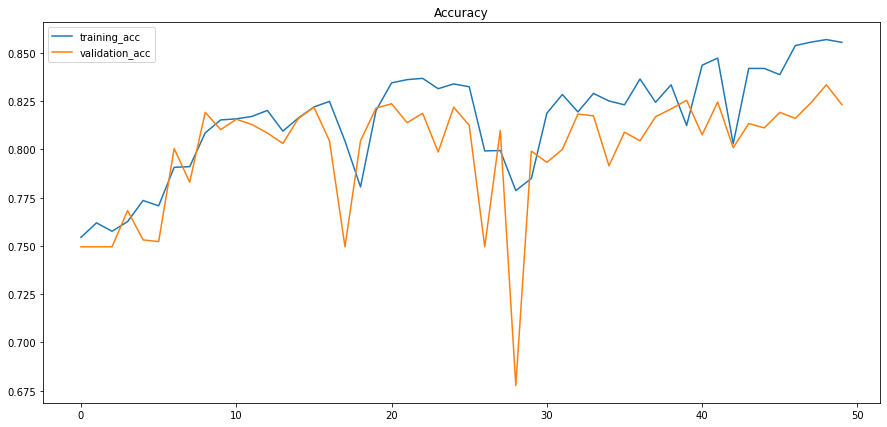

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(range(50), snn_model_history.history['acc'])
plt.plot(range(50), snn_model_history.history['val_acc'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

In [49]:
emb_dim = embedding_matrix.shape[1]
gru_model = Sequential()
gru_model.add(Embedding(vocab_length, emb_dim, trainable = False, weights=[embedding_matrix]))
# embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
gru_model.add(GRU(128, return_sequences=False))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(1, activation = 'sigmoid'))
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(gru_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         1817800   
                                                                 
 gru (GRU)                   (None, 128)               88320     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,906,249
Trainable params: 88,449
Non-trainable params: 1,817,800
_________________________________________________________________
None


In [51]:
history = gru_model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
70/70 [==============================] - 9s 131ms/step - loss: 0.5513 - accuracy: 0.7619 - val_loss: 0.5628 - val_accuracy: 0.7496
Epoch 2/50
70/70 [==============================] - 9s 127ms/step - loss: 0.5512 - accuracy: 0.7619 - val_loss: 0.5632 - val_accuracy: 0.7496
Epoch 3/50
70/70 [==============================] - 9s 135ms/step - loss: 0.5504 - accuracy: 0.7619 - val_loss: 0.5631 - val_accuracy: 0.7496
Epoch 4/50
70/70 [==============================] - 9s 135ms/step - loss: 0.5511 - accuracy: 0.7619 - val_loss: 0.5629 - val_accuracy: 0.7496
Epoch 5/50
70/70 [==============================] - 9s 129ms/step - loss: 0.5505 - accuracy: 0.7619 - val_loss: 0.5649 - val_accuracy: 0.7496
Epoch 6/50
70/70 [==============================] - 9s 124ms/step - loss: 0.5511 - accuracy: 0.7619 - val_loss: 0.5631 - val_accuracy: 0.7496
Epoch 7/50
70/70 [==============================] - 9s 129ms/step - loss: 0.5517 - accuracy: 0.7619 - val_loss: 0.5645 - val_accuracy: 0.7496
Epoch 

In [52]:
predictions = (gru_model.predict(X_test) > 0.5).astype("int32")
gruf1=f1_score(y_test,predictions)
gruf1

88/88 [==============================] - 2s 22ms/step


0.8562091503267973

Text(0.5, 1.0, 'Accuracy')

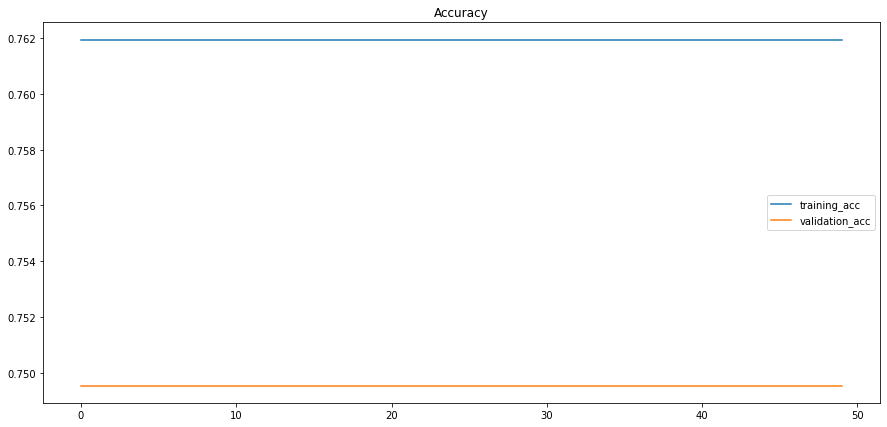

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(range(50), history.history['accuracy'])
plt.plot(range(50), history.history['val_accuracy'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

In [55]:
model2 = Sequential()
model2.add(Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False))
model2.add(Bidirectional(LSTM(128,return_sequences = False)))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1817800   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,052,553
Trainable params: 234,753
Non-trainable params: 1,817,800
_________________________________________________________________


In [57]:
bi_lstm = model2.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
70/70 [==============================] - 23s 335ms/step - loss: 0.5439 - accuracy: 0.7610 - val_loss: 0.5237 - val_accuracy: 0.7594
Epoch 2/50
70/70 [==============================] - 26s 370ms/step - loss: 0.4854 - accuracy: 0.7718 - val_loss: 0.4942 - val_accuracy: 0.7728
Epoch 3/50
70/70 [==============================] - 26s 376ms/step - loss: 0.4557 - accuracy: 0.7919 - val_loss: 0.4845 - val_accuracy: 0.7848
Epoch 4/50
70/70 [==============================] - 26s 375ms/step - loss: 0.4255 - accuracy: 0.8117 - val_loss: 0.4510 - val_accuracy: 0.7982
Epoch 5/50
70/70 [==============================] - 26s 374ms/step - loss: 0.3970 - accuracy: 0.8296 - val_loss: 0.4223 - val_accuracy: 0.8232
Epoch 6/50
70/70 [==============================] - 26s 375ms/step - loss: 0.3786 - accuracy: 0.8379 - val_loss: 0.4261 - val_accuracy: 0.8201
Epoch 7/50
70/70 [==============================] - 26s 369ms/step - loss: 0.3663 - accuracy: 0.8407 - val_loss: 0.4249 - val_accuracy: 0.8165

In [59]:
predictions = (model2.predict(X_test) > 0.5).astype("int32")
bilstmf1=f1_score(y_test,predictions)
bilstmf1

88/88 [==============================] - 6s 49ms/step


0.8654511885529657

Text(0.5, 1.0, 'Accuracy')

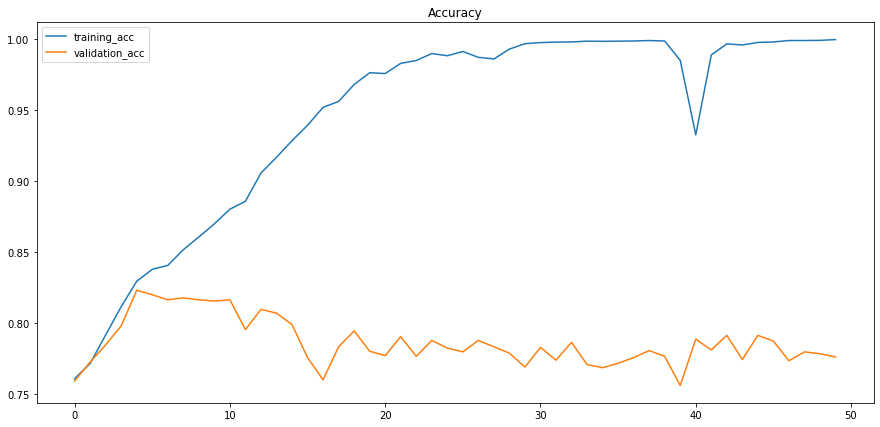

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(range(50), bi_lstm.history['accuracy'])
plt.plot(range(50), bi_lstm.history['val_accuracy'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

# Results

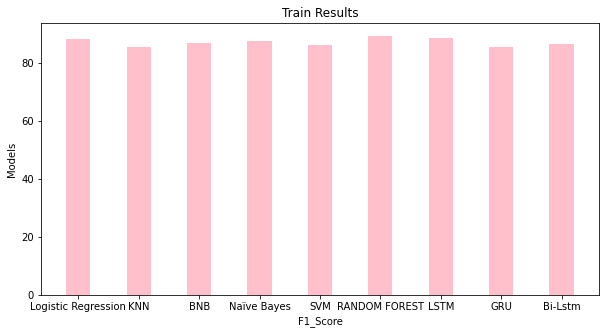

In [64]:
import matplotlib.pyplot as plt
 
data = {'Logistic Regression':f1_score_data['F1 Score'][0]*100, 'KNN':f1_score_data['F1 Score'][1]* 100,
       'BNB':f1_score_data['F1 Score'][2]* 100,'Naïve Bayes':f1_score_data['F1 Score'][3]* 100,
       'SVM':f1_score_data['F1 Score'][4]* 100,'RANDOM FOREST':f1_score_data['F1 Score'][5]* 100,
       'LSTM':lstmf1* 100,'GRU':gruf1* 100, 'Bi-Lstm':bilstmf1* 100}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='pink',
        width = 0.4)
 
plt.xlabel("F1_Score")
plt.ylabel("Models")
plt.title("Train Results")
plt.show()